# Netflix EDA analysis



In [1]:
#impoerting required libraries of python 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## About the data


In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Handling missing value

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.fillna({'director':'unavailable', 'cast':'unavailable', 'country':'unavailable', 'rating':'unavailable'}, inplace = True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [10]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,unavailable,Igor Dmitriev,unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [11]:
most_recent_date = df['date_added'].max()
df.fillna({'date_added':most_recent_date}, inplace = True)

In [12]:
df[df.show_id == 's7255']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7254,s7255,TV Show,La Familia P. Luche,unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2021-09-25,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."


In [13]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [14]:
df.loc[df['director'] == 'Louis C.K.','duration'] = df['rating']
df.loc[df['director'] == 'Louis C.K.','rating'] = 'Unavailable'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


## Visualizations

In [15]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs Type of Shows')

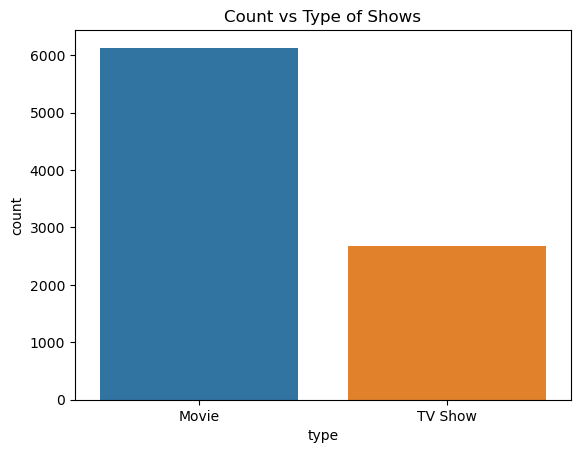

In [16]:
sns.countplot(x = 'type' , data = df)
plt.title('Count vs Type of Shows')

In [17]:
df['country'].value_counts().head(10)

United States     2818
India              972
unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise content on Netflix')

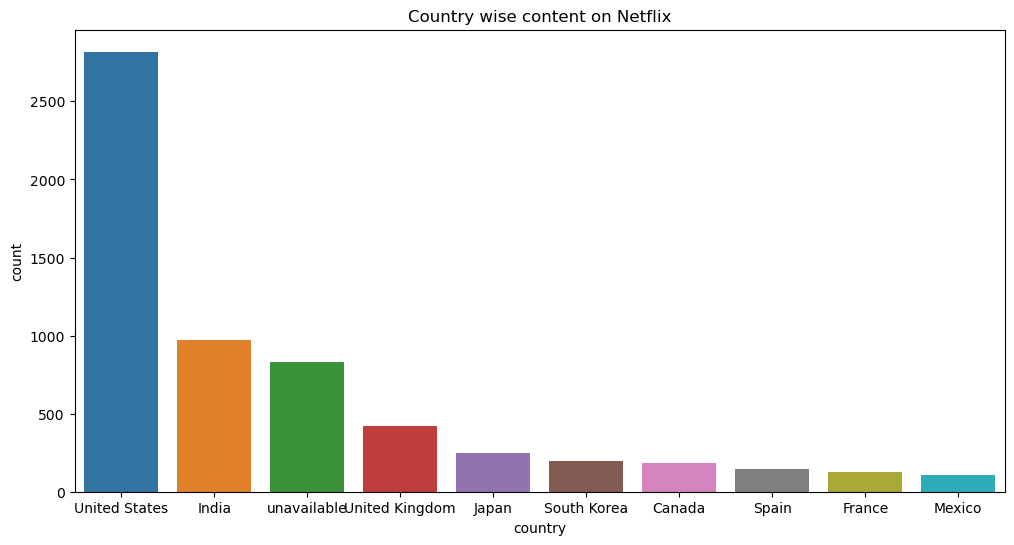

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'country', order = df['country'].value_counts().index[0:10]  , data = df)
plt.title('Country wise content on Netflix')

In [19]:
movie_countries = df[df['type'] == 'Movie']
tvshows_countries = df[df['type'] == 'TV Show']

Text(0.5, 1.0, 'Country wise movies on Netflix')

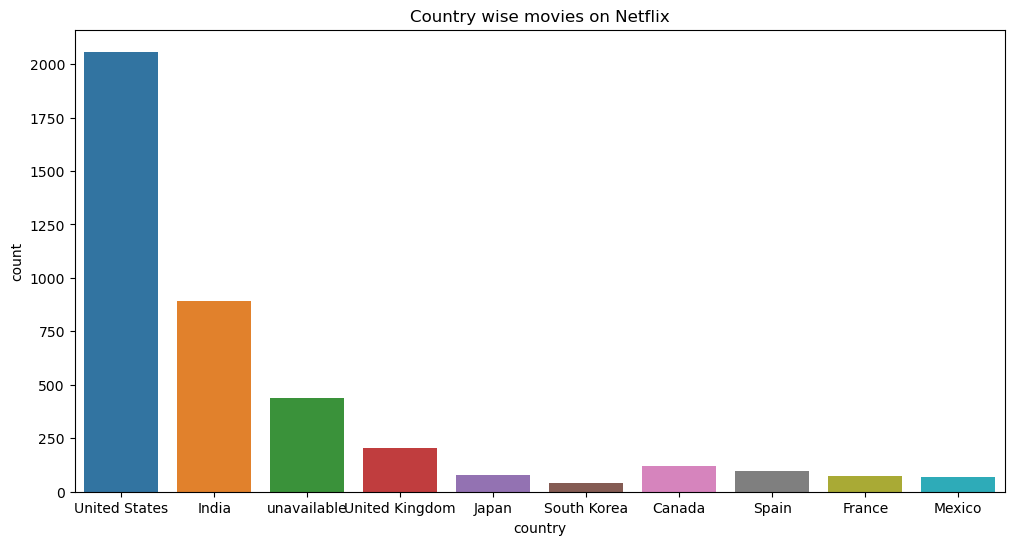

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'country', order = df['country'].value_counts().index[0:10]  , data = movie_countries)
plt.title('Country wise movies on Netflix')

Text(0.5, 1.0, 'Country wise TV shows on Netflix')

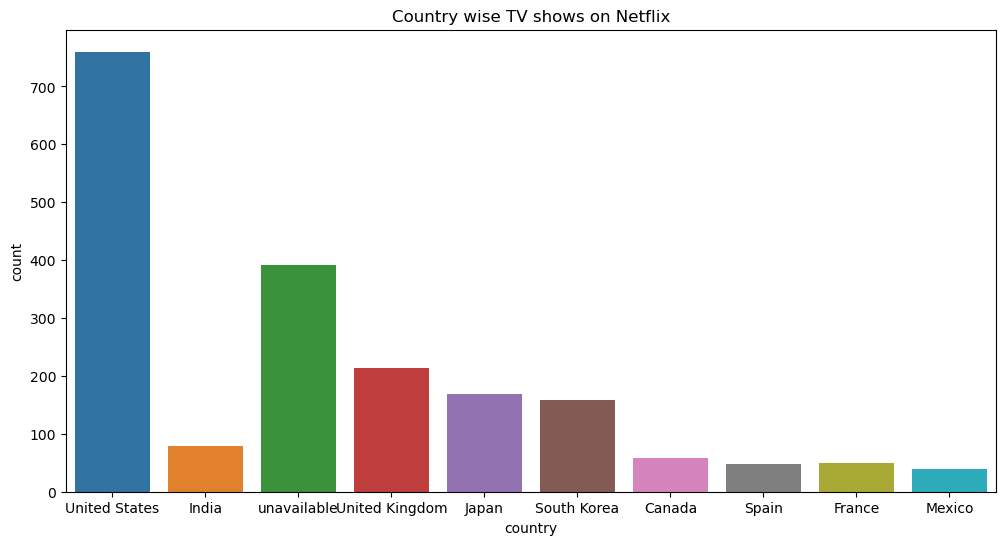

In [21]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'country', order = df['country'].value_counts().index[0:10]  , data = tvshows_countries )
plt.title('Country wise TV shows on Netflix')

In [22]:
df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
unavailable       4
NC-17             3
Unavailable       3
UR                3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating of shows on  netflix')

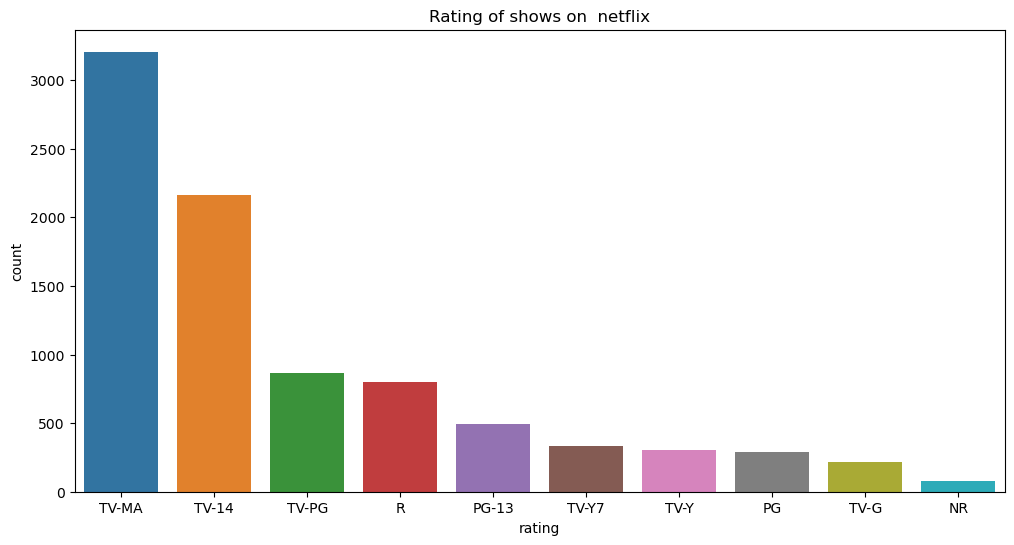

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'rating', order = df['rating'].value_counts().index[0:10]  , data = df )
plt.title('Rating of shows on  netflix')

In [24]:
df.release_year.value_counts().head(15)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Numnber of shows released on netflix by year ')

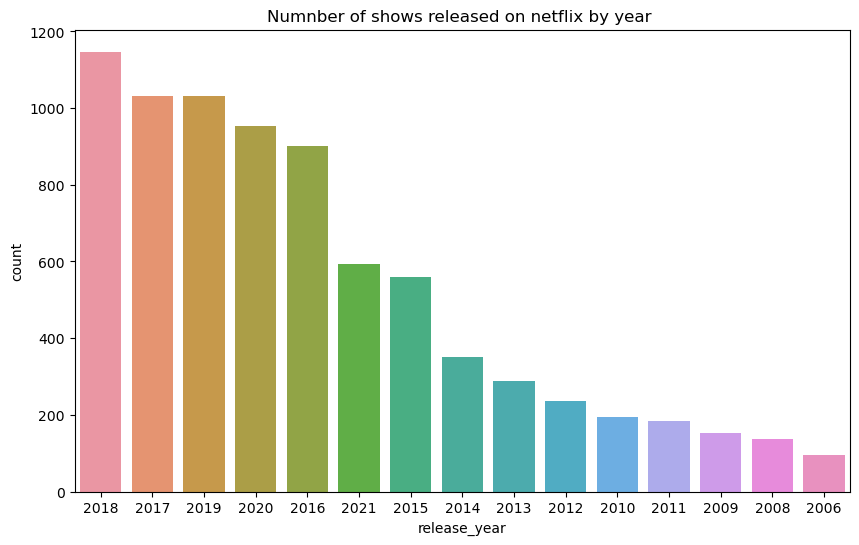

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'release_year', order = df['release_year'].value_counts().index[0:15]  , data = df )
plt.title('Numnber of shows released on netflix by year ')

In [26]:
df.listed_in.value_counts().head(15)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Comedies, International Movies, Romantic Movies     152
Dramas                                              138
Dramas, International Movies, Thrillers             134
Action & Adventure, Dramas, International Movies    132
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'Top 15 genres on Netflix')

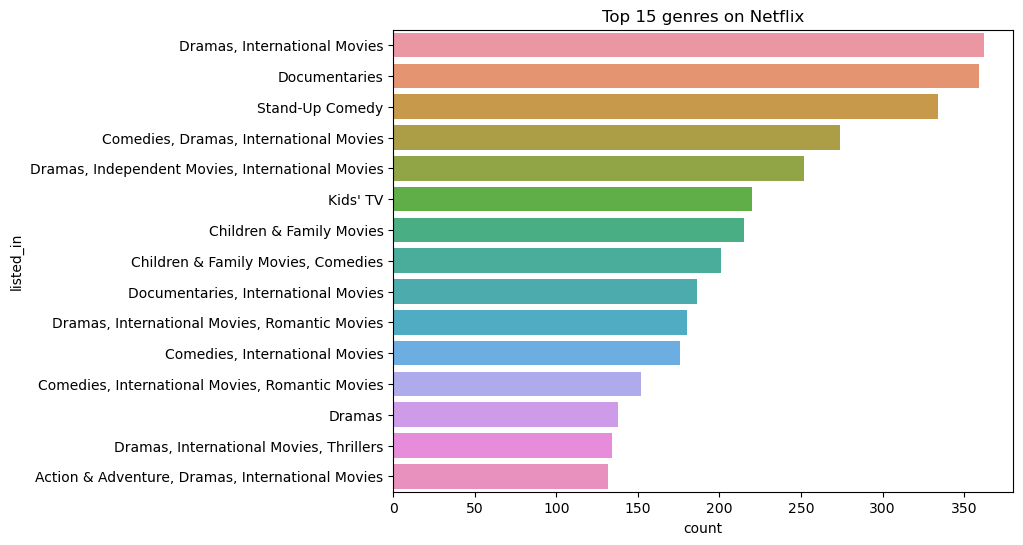

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(y = 'listed_in', order = df['listed_in'].value_counts().index[0:15]  , data = df )
plt.title('Top 15 genres on Netflix')

### Summary

We used a lot of operation on the current dataset and find out the following conclusion :-
 
- There are more movies on Netflix than the Tv shows 
- Most number of movies and Tv shows are produced by USA
- Most of the shows present on Netflix is for the mature audience
- On year 2018 most number of content is realesed on Netflix
- International movies and Dramas are the most popular genre on Netflix